## Automate Google Form :

- This program fill your Google Form by the detail provide in csv file
- And rest of the detail not provide in csv file but in google form you have to file manually and submit your form
- You have only provide the google form url ,program open the chrome brower with open google form

#### For Open chrome:
- In cmd change directory to the path where your chrome.exe are present 
  cd C:\Program Files (x86)\Google\Chrome\Application
- run in cmd - chrome.exe -remote-debugging-port=9014 --user-data-dir = "path_where_you_want_to_storage_chrome_data"

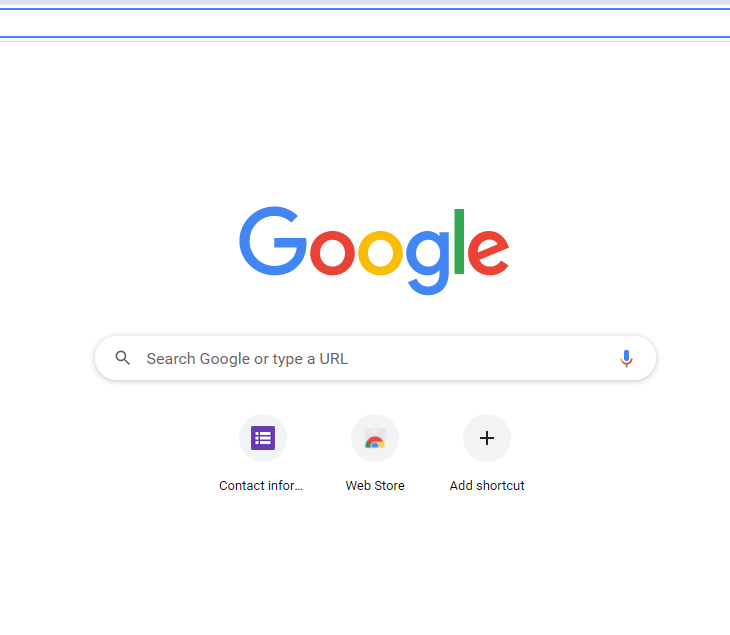

In [1]:
from selenium import webdriver
import pandas as pd
from selenium.webdriver.chrome.options import Options
import time

In [2]:
def fill_form(entry,col,df):
    print('Processing',end='')
    for i in entry:
        print('.',end='')
        text=i.text.split('\n')
        if "*" in text[0].split():
            head=text[0][:-2].lower()
        else:
            head=text[0].lower()
        if text[-1]=='Your answer' or text[-1]==' This is a required question' :
            if head in col:
                values = df[head][0]
                try:
                    i=i.find_element_by_class_name('quantumWizTextinputPaperinputInput')
                except:
                    i=i.find_element_by_class_name('quantumWizTextinputPapertextareaInput')
                time.sleep(1)
                i.send_keys(values)
        else:
            if head in col:
                listed=i.find_elements_by_class_name('freebirdFormviewerComponentsQuestionCheckboxChoice')
                if len(listed)==0:
                    listed=i.find_elements_by_class_name('freebirdFormviewerComponentsQuestionRadioChoice')
                for n in listed:
                    if n.text==df[head][0]:
                        n.click()
    print("\nComplete")
            

#### Fill_detail: Open the chrome Browser and open the provides google form url:

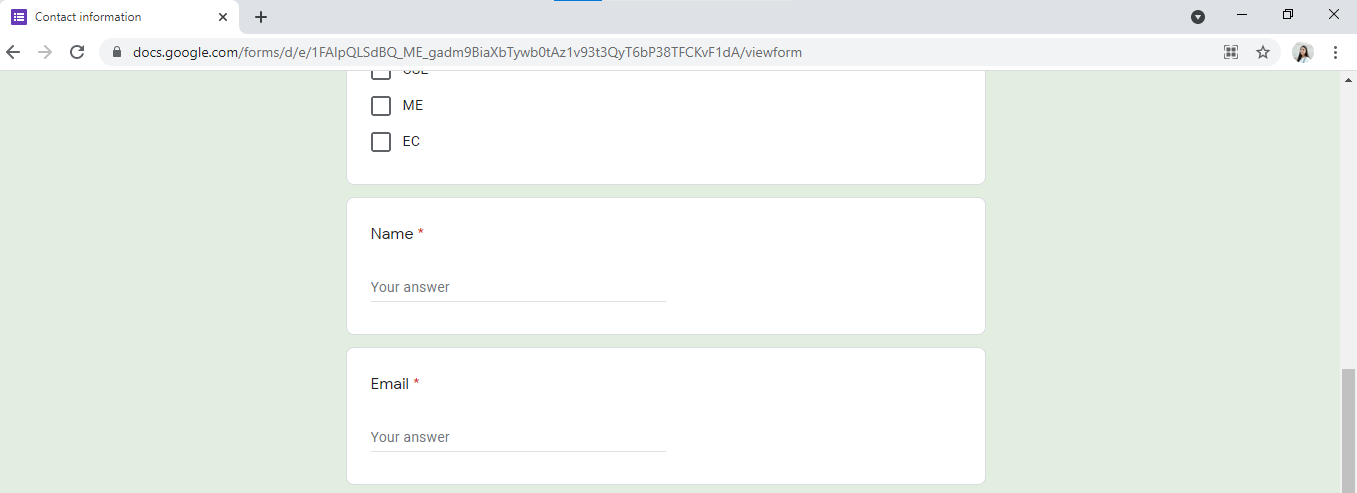

In [3]:
def fill_detail(url):
    chrome_options = Options()
    chrome_options.add_experimental_option("debuggerAddress", "localhost:9014")
    driver=webdriver.Chrome(options=chrome_options)
    driver.get(url)
    time.sleep(1)
    entry=driver.find_elements_by_class_name("freebirdFormviewerViewNumberedItemContainer")
    df=pd.read_csv('Detail.csv')
    col=list(df.columns)
    for i in col:
        df[i]=df[i].astype('str')
    fill_form(entry,col,df)

    

#### fill_form(entry,col,df) : Fill the google form by detail provide in csv file

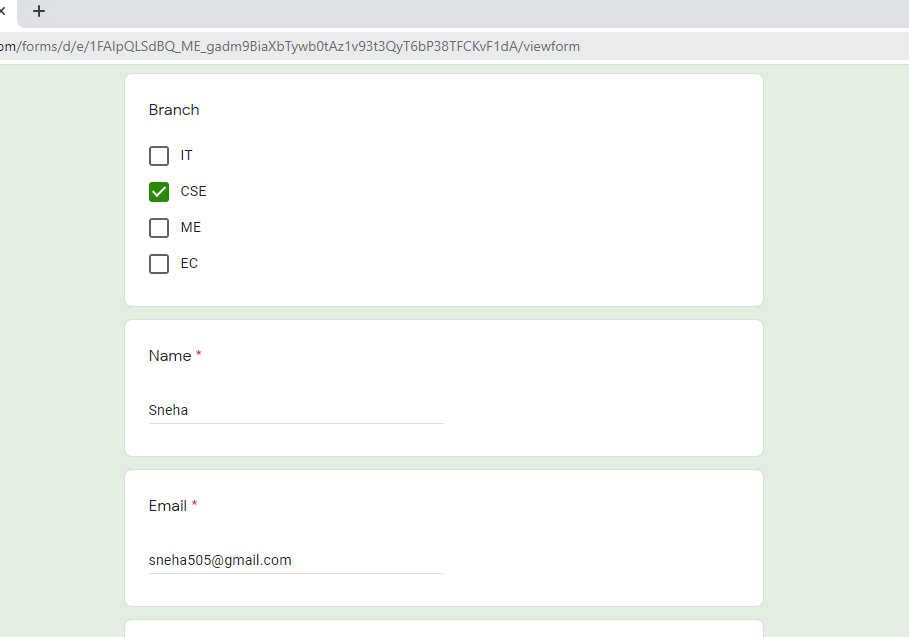

In [4]:
fill_detail("https://docs.google.com/forms/d/e/1FAIpQLSdBQ_ME_gadm9BiaXbTywb0tATFCKvF1dA/viewform?usp=sf_link")

Processing.......
Complete
